In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploded = files.upload()

Saving 50_Startups MultiLinearRegression.csv to 50_Startups MultiLinearRegression.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploded['50_Startups MultiLinearRegression.csv']))

In [5]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


dropping column which is not required

In [8]:
df.drop(['State'],axis = 1, inplace = True)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [10]:
X = df.drop(['Profit'],axis=1).values
Y = df['Profit'].values

In [11]:
print(X)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [12]:
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
ml = LinearRegression()

fitting model

In [18]:
ml.fit(X_train,Y_train)

LinearRegression()

In [19]:
Y_pred = ml.predict(X_test)
print(Y_pred)

[104054.44293869 132719.3459701  133640.26830949  72294.76911458
 179685.62227843 114508.97572031  66305.23069863  98297.69326565
 114277.91894933 169112.36095691  96257.40152149  87916.97242208
 110687.33942598  90670.8337806  127780.63539583]


In [20]:
ml.predict([[114523.61, 122616.84, 261776.23]])

array([145006.02381207])

In [21]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9355188337118219

Text(0.5, 1.0, 'Multi Linear Regression Model')

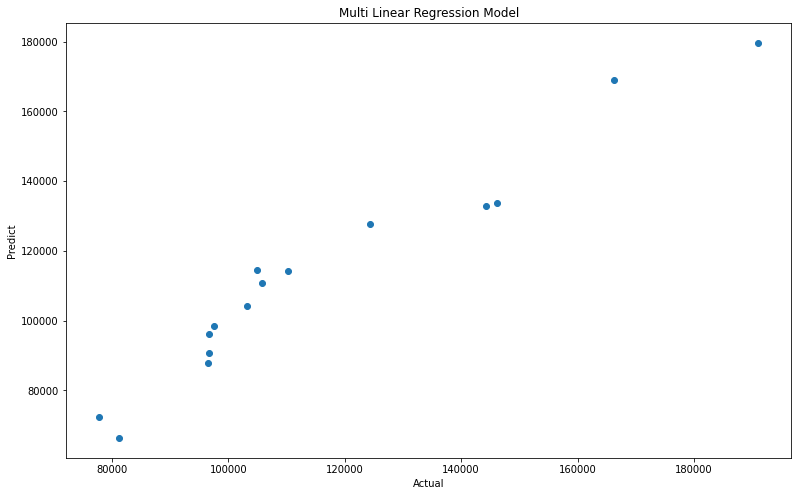

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Multi Linear Regression Model')

pickle module

In [ ]:
import pickle

In [ ]:
filename = 'profit_pred'
pickle.dump(ml, open(filename,'wb'))